Steps:

**Import libraries

**Load data

**Missing Values

**Data Analysis
 - Histogram
 - Growth by date
 - Growth by month of different year
 - Growth by year
 - Growth by store
 - Year growth by item
 
**Prophet Model
 - Advantages over Time Series
 - Modeling Framework & Theory
 - Model Building with Prophet
 - Fourier order of seasonality and additional regressors
 - Additional regressors (like NFL Sundays)
 - SMAPE calculation
 - Splitting data by store and item (Automation for Prophet)
 - Prediction
 - Further improvements
 
**Time Series with Neural Networks
 - Prediction with 1 layer
 - Plot forecast and calculate MSE
 - Shifting input
 - Output plot & model fitting
 
**Extensions
 - Choosing optimal number of hidden layers
 - Fitting ELM feed forward NN for forecasting
 - Temporal Hierarchies for forecasting
 - Automation based on ELM/MLP NN forecasting

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras

In [85]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(8,8),'figure.dpi':(300)})

In [117]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [118]:
print(train.shape)

(913000, 4)


In [119]:
display(train.iloc[500:].head(4))
display(test.head())

,date,store,item,sales
500,2014-05-16,1,1,23
501,2014-05-17,1,1,18
502,2014-05-18,1,1,36
503,2014-05-19,1,1,12


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [120]:
train.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [121]:
train.isna().any()

date     False
store    False
item     False
sales    False
dtype: bool

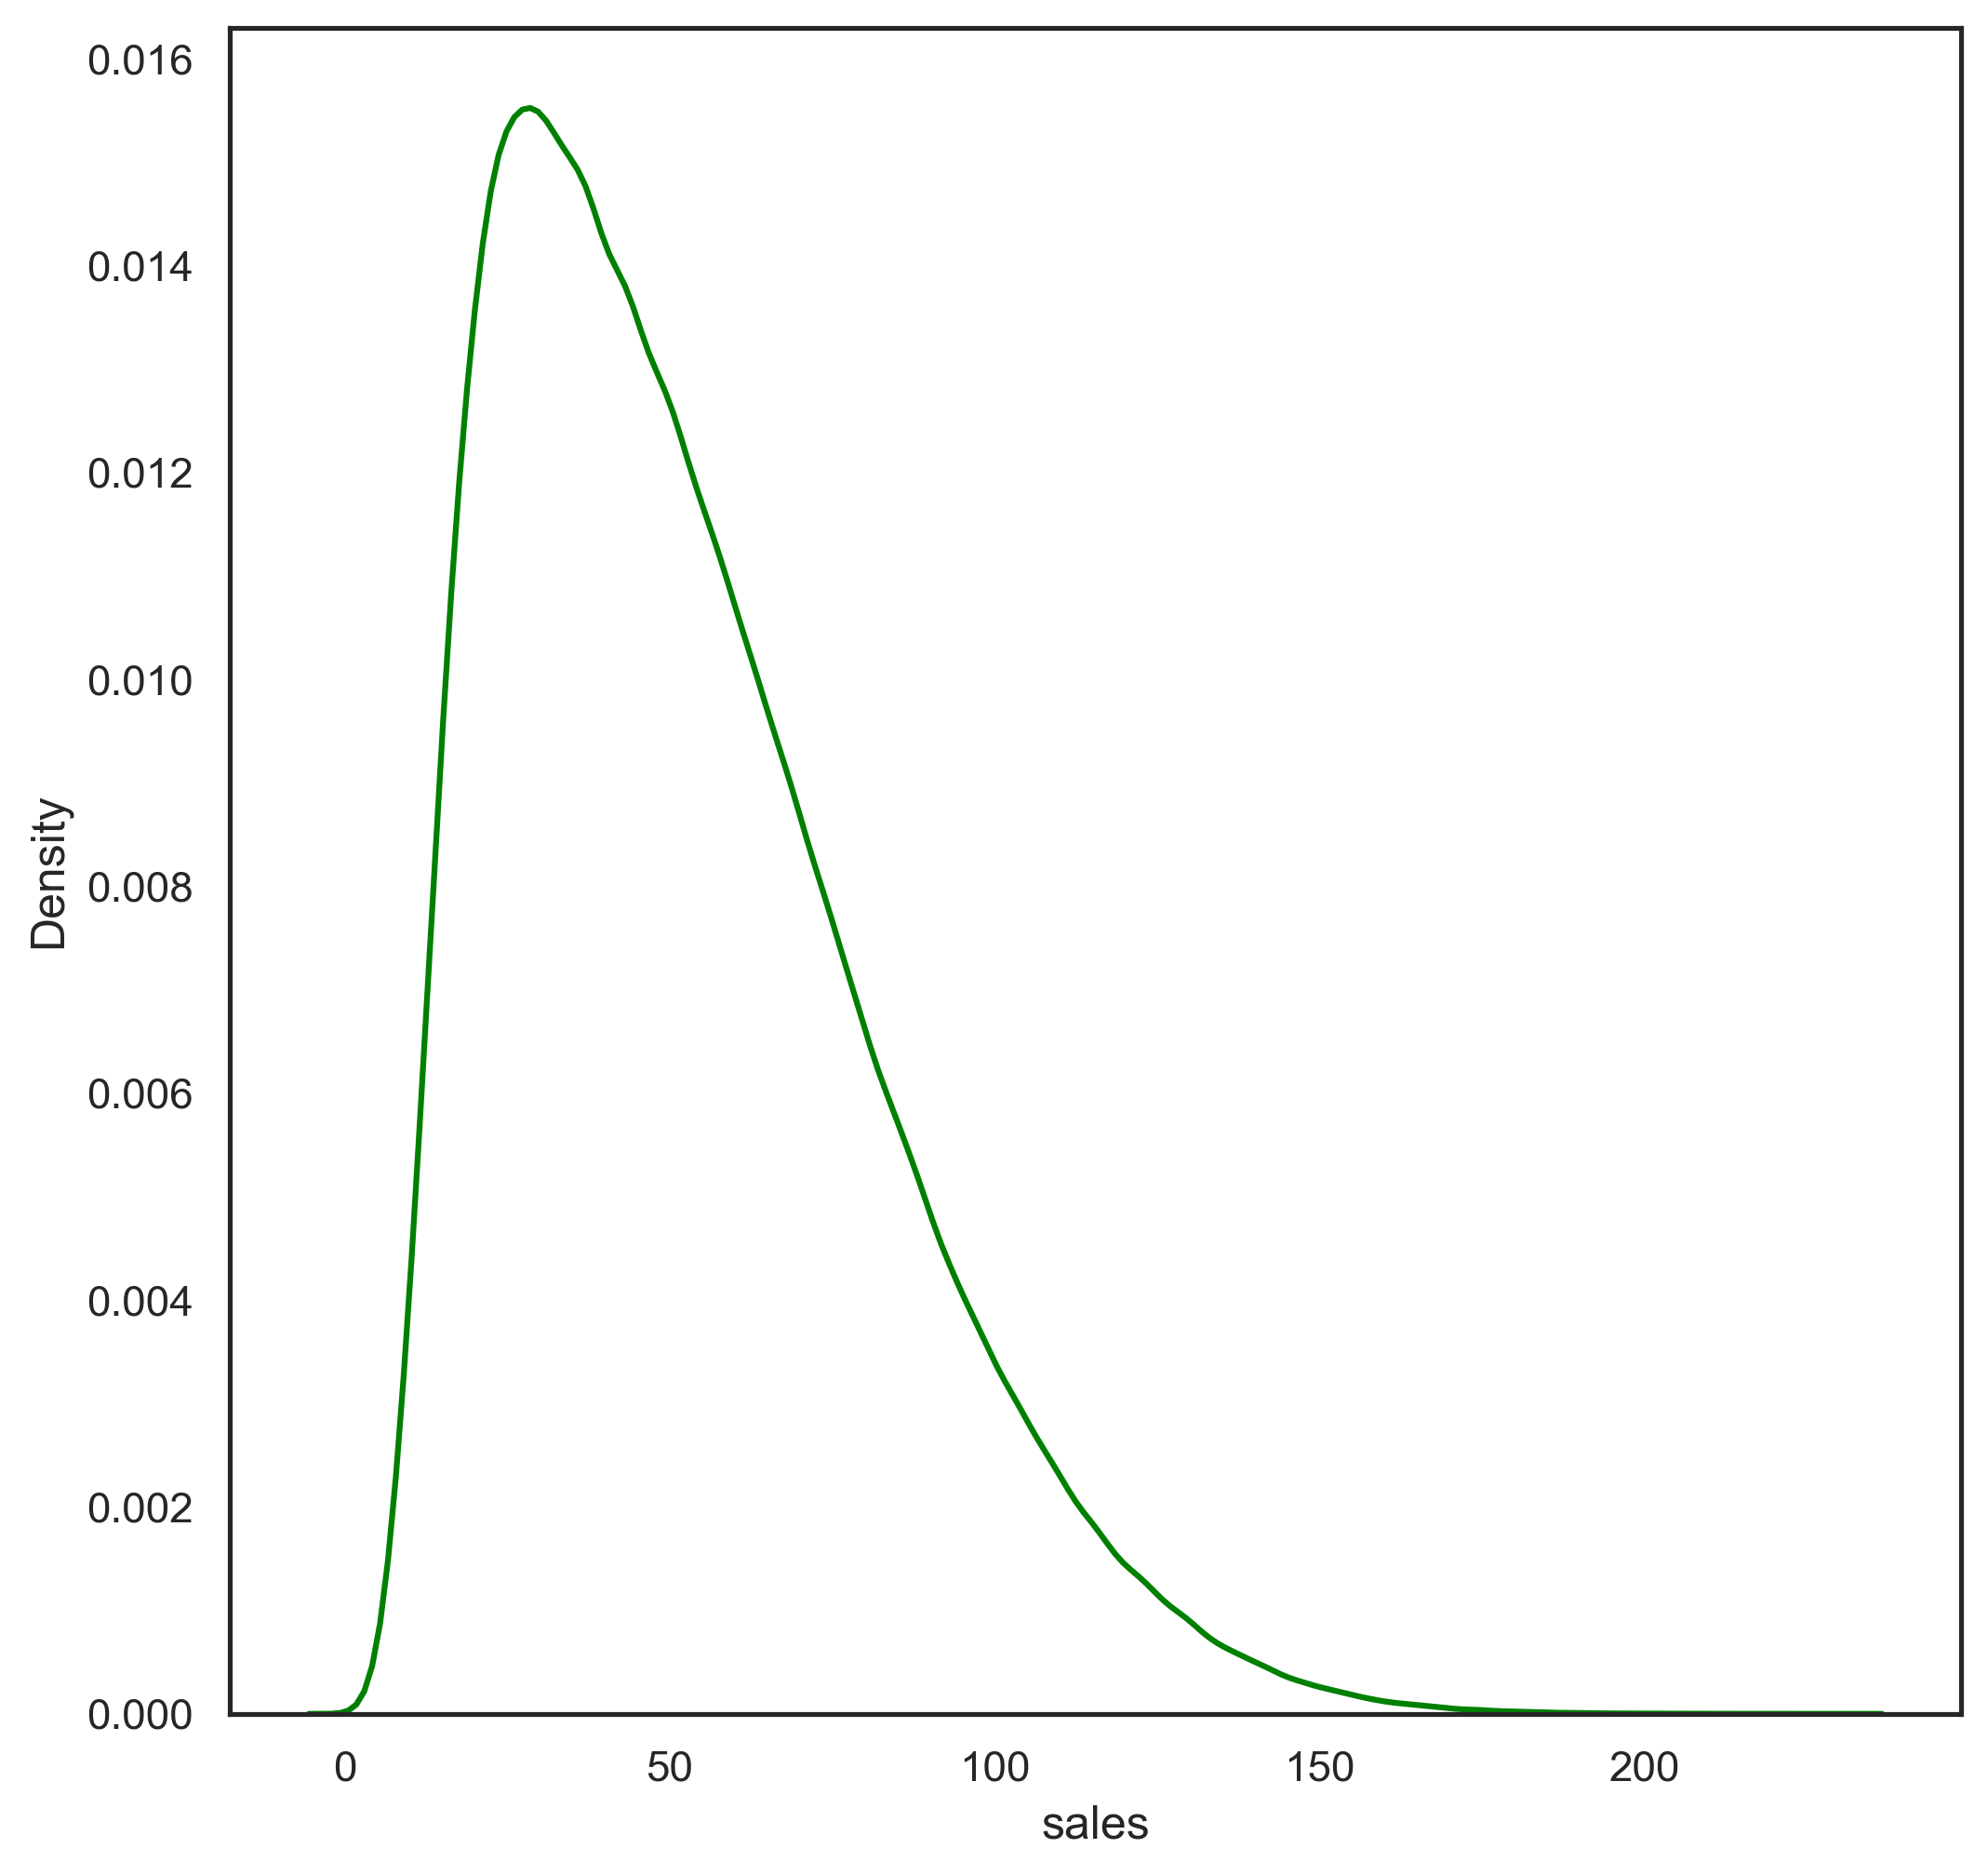

In [122]:
sns.kdeplot(data=train['sales'], color='Green')
plt.show()

<AxesSubplot:xlabel='date', ylabel='sales'>

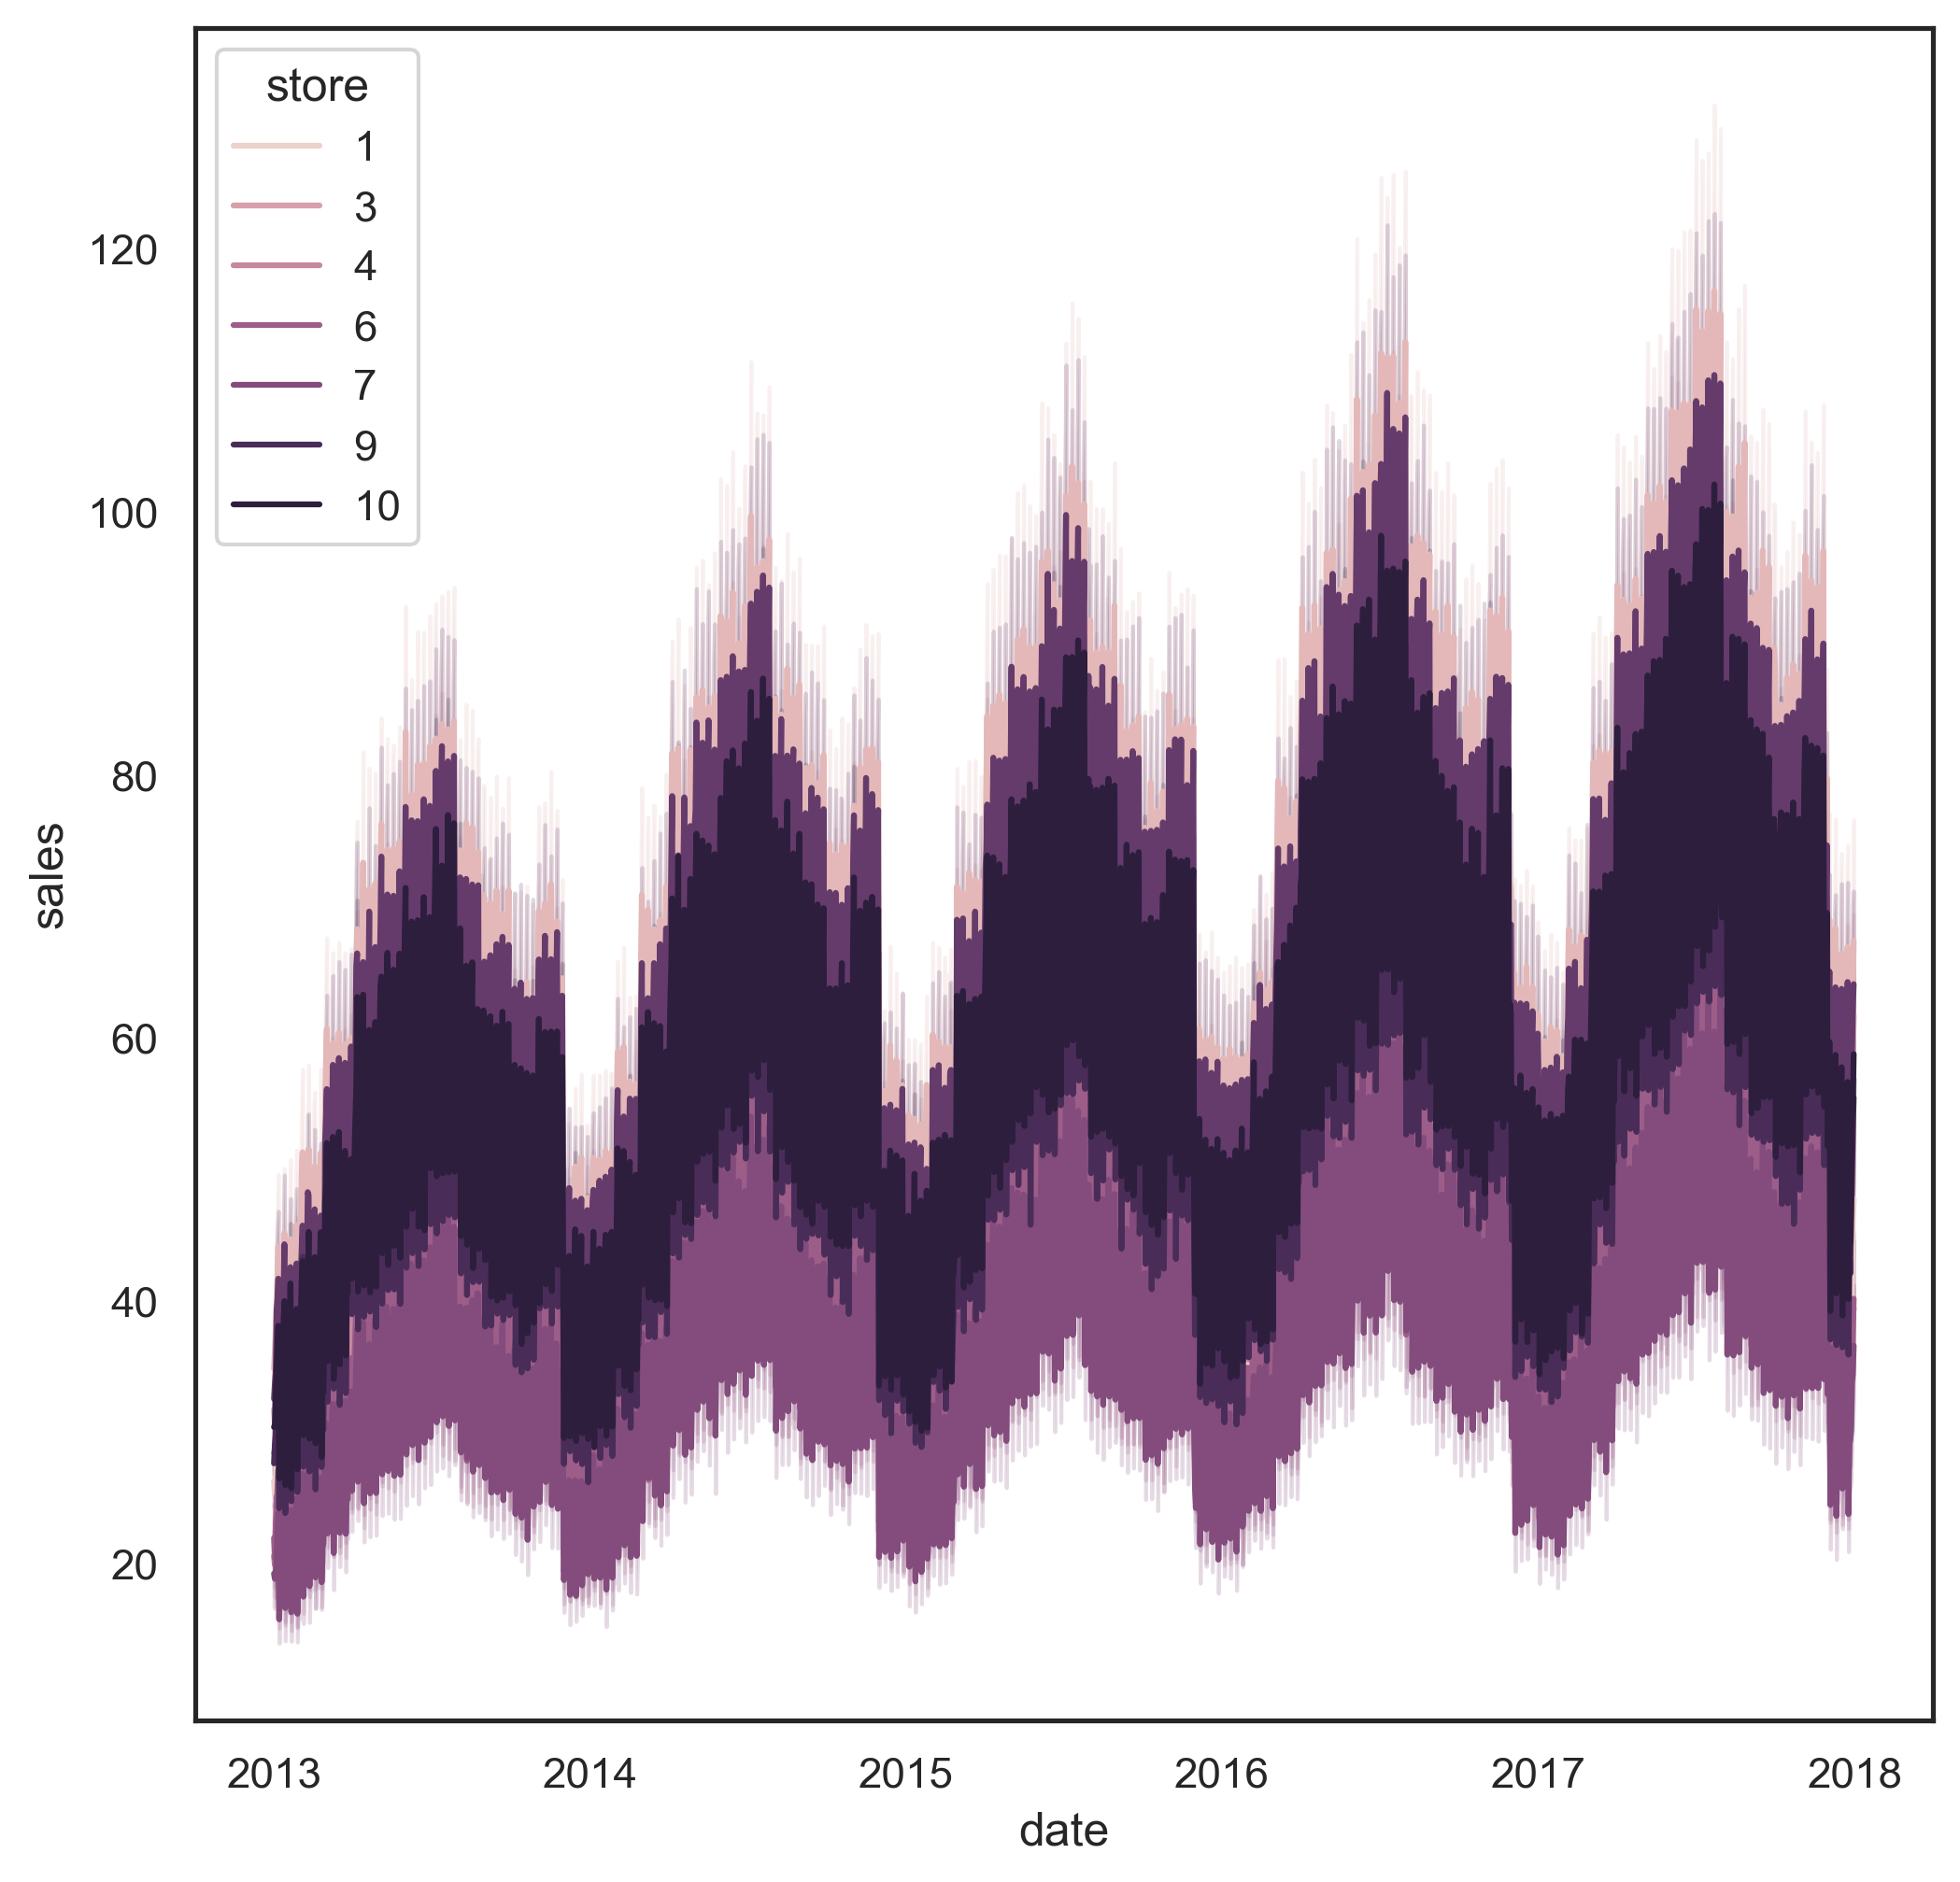

In [127]:
sns.lineplot(data=train, x='date', y='sales', hue='store')

In [125]:
train['date'] = pd.to_datetime(train['date'])

In [126]:
dfI = {}
dfs = {}
for x in range(1,11):
    dfs['store' + str(x)] = train.groupby('store').get_group(x)
    dfI['store' + str(x)] = {}
    for y in range(1,51):
        dfI['store'+str(x)]['item'+str(y)] = train.groupby('store').get_group(x).drop('store', axis=1).groupby('item').get_group(y).drop('item',axis=1)

In [92]:
print(len(dfI['store10']['item50']))

1826


<AxesSubplot:xlabel='date', ylabel='sales'>

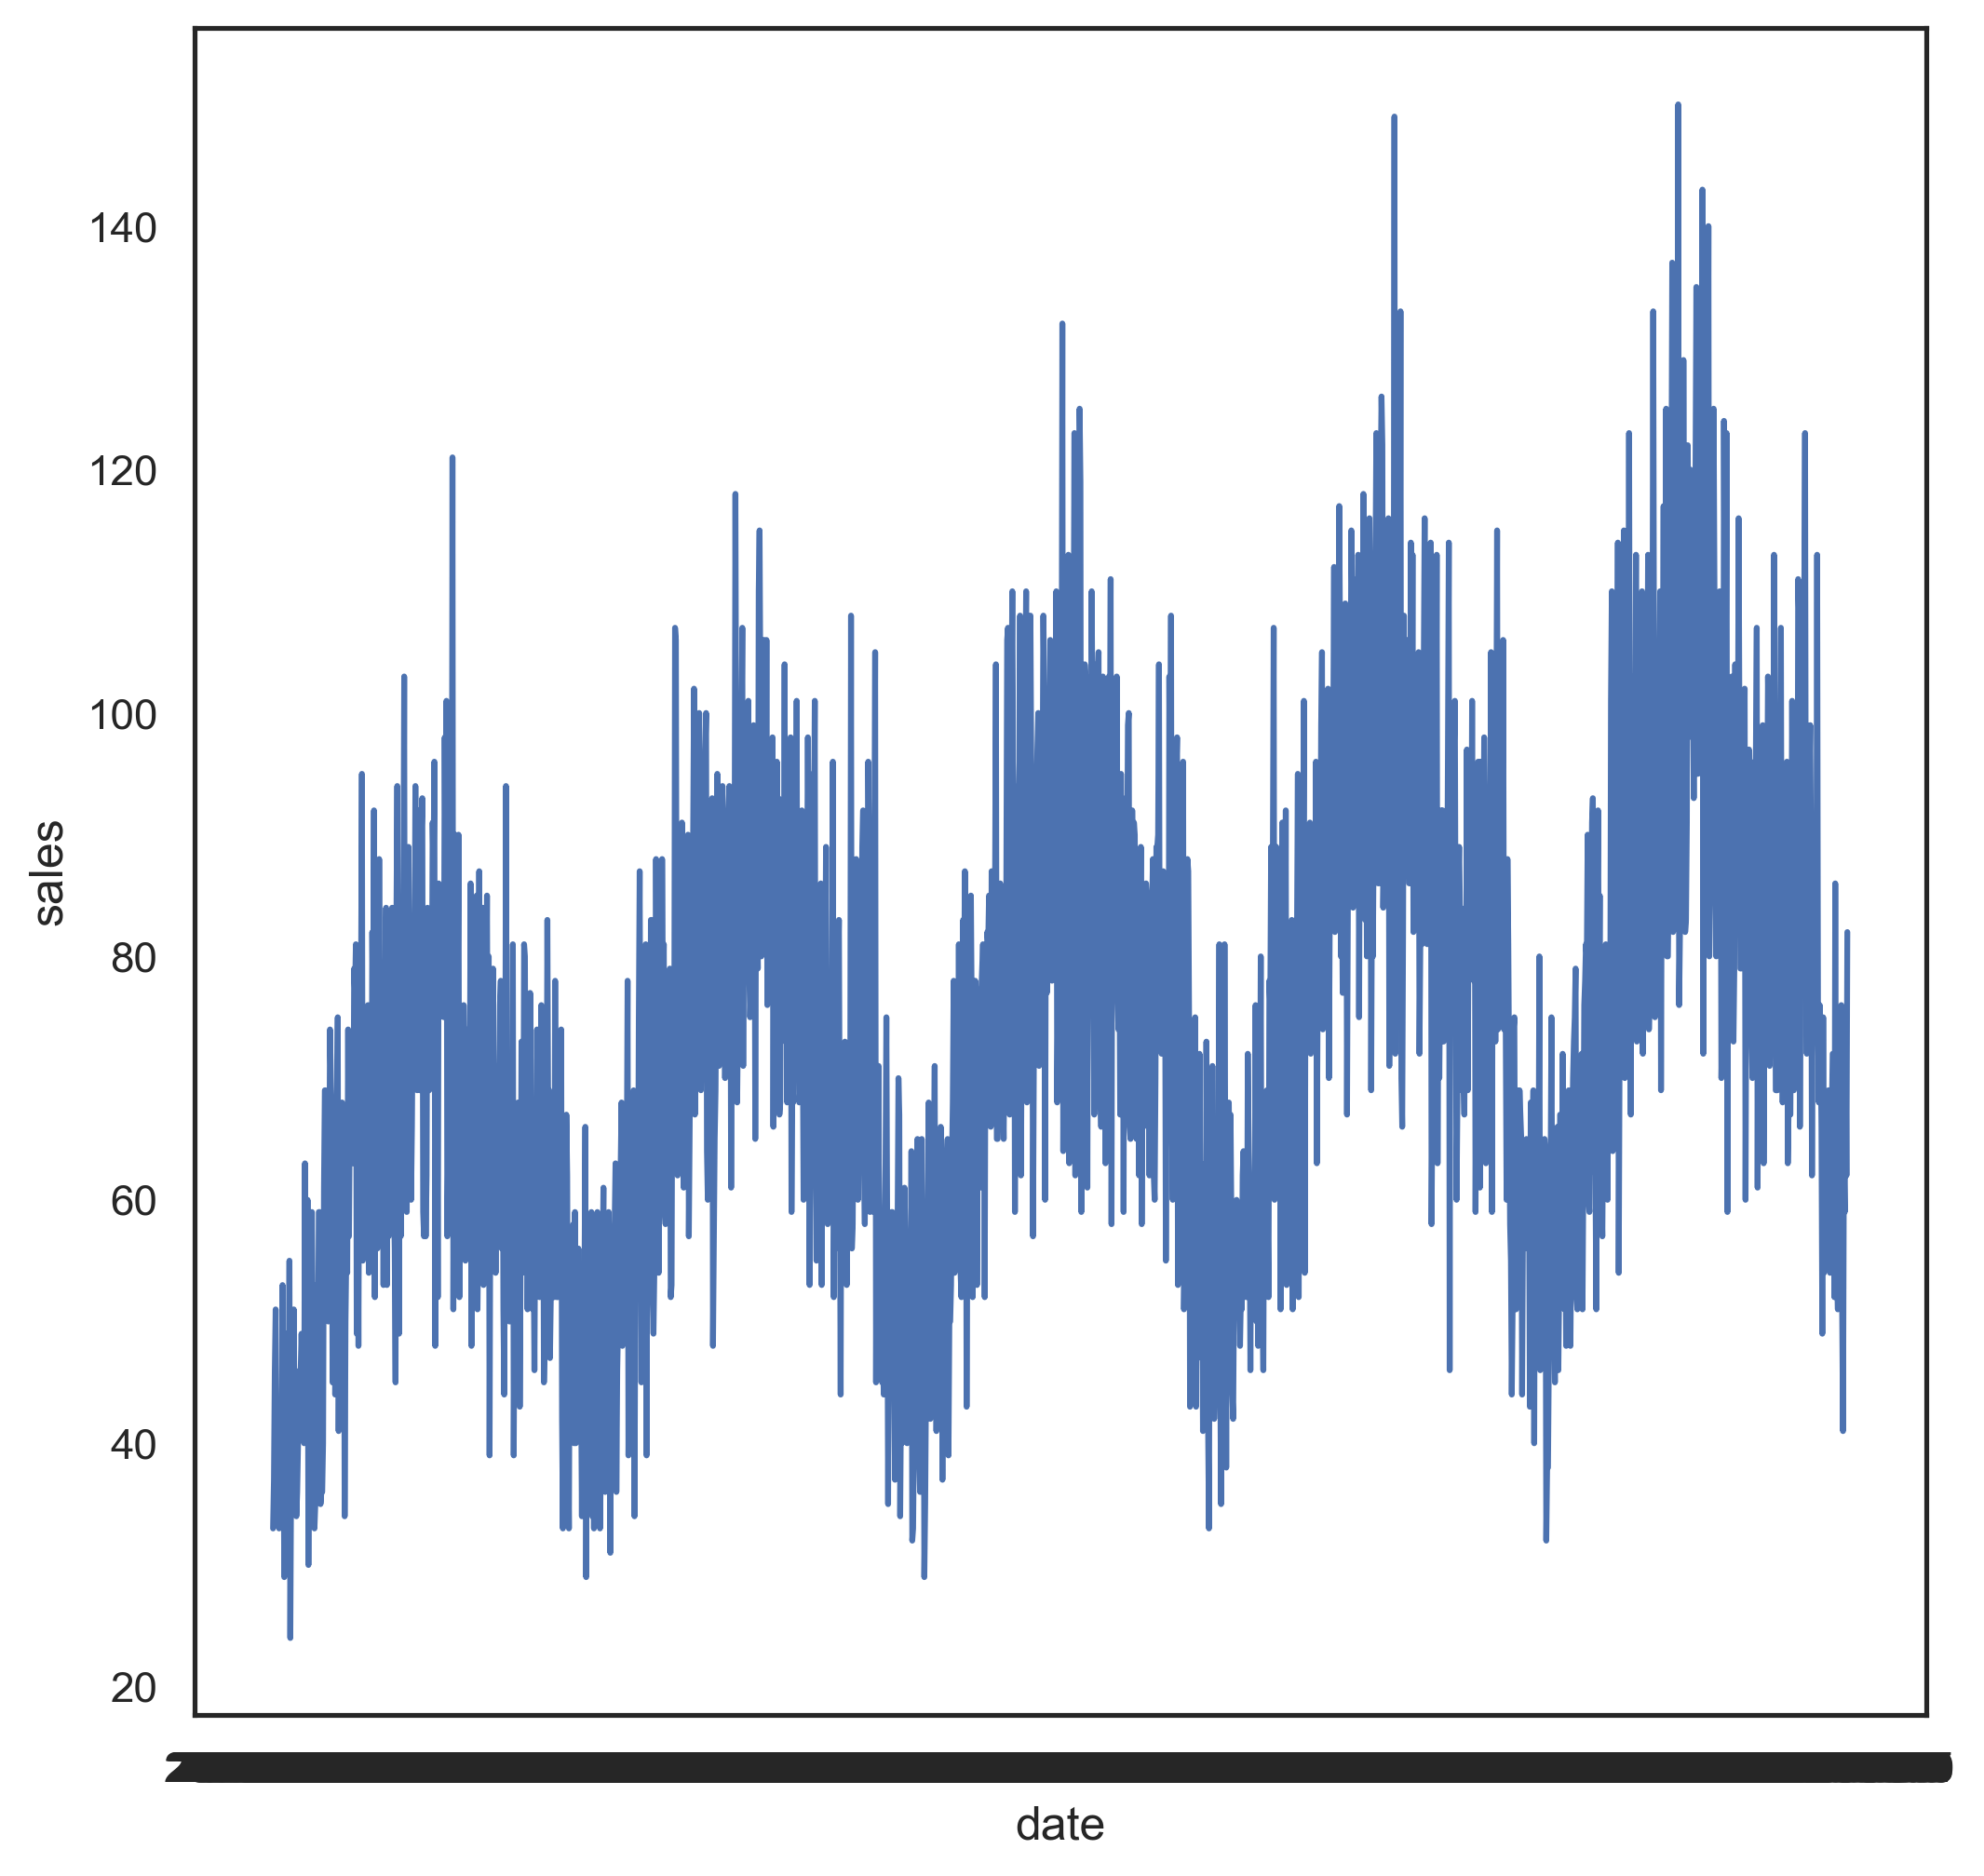

In [87]:
sns.lineplot(data = dfs['store10']['item50'], x='date', y='sales')

In [129]:
mMeanSales = dfI['store10']['item50'].set_index('date').groupby(pd.Grouper(freq='M')).mean()

<AxesSubplot:xlabel='date', ylabel='sales'>

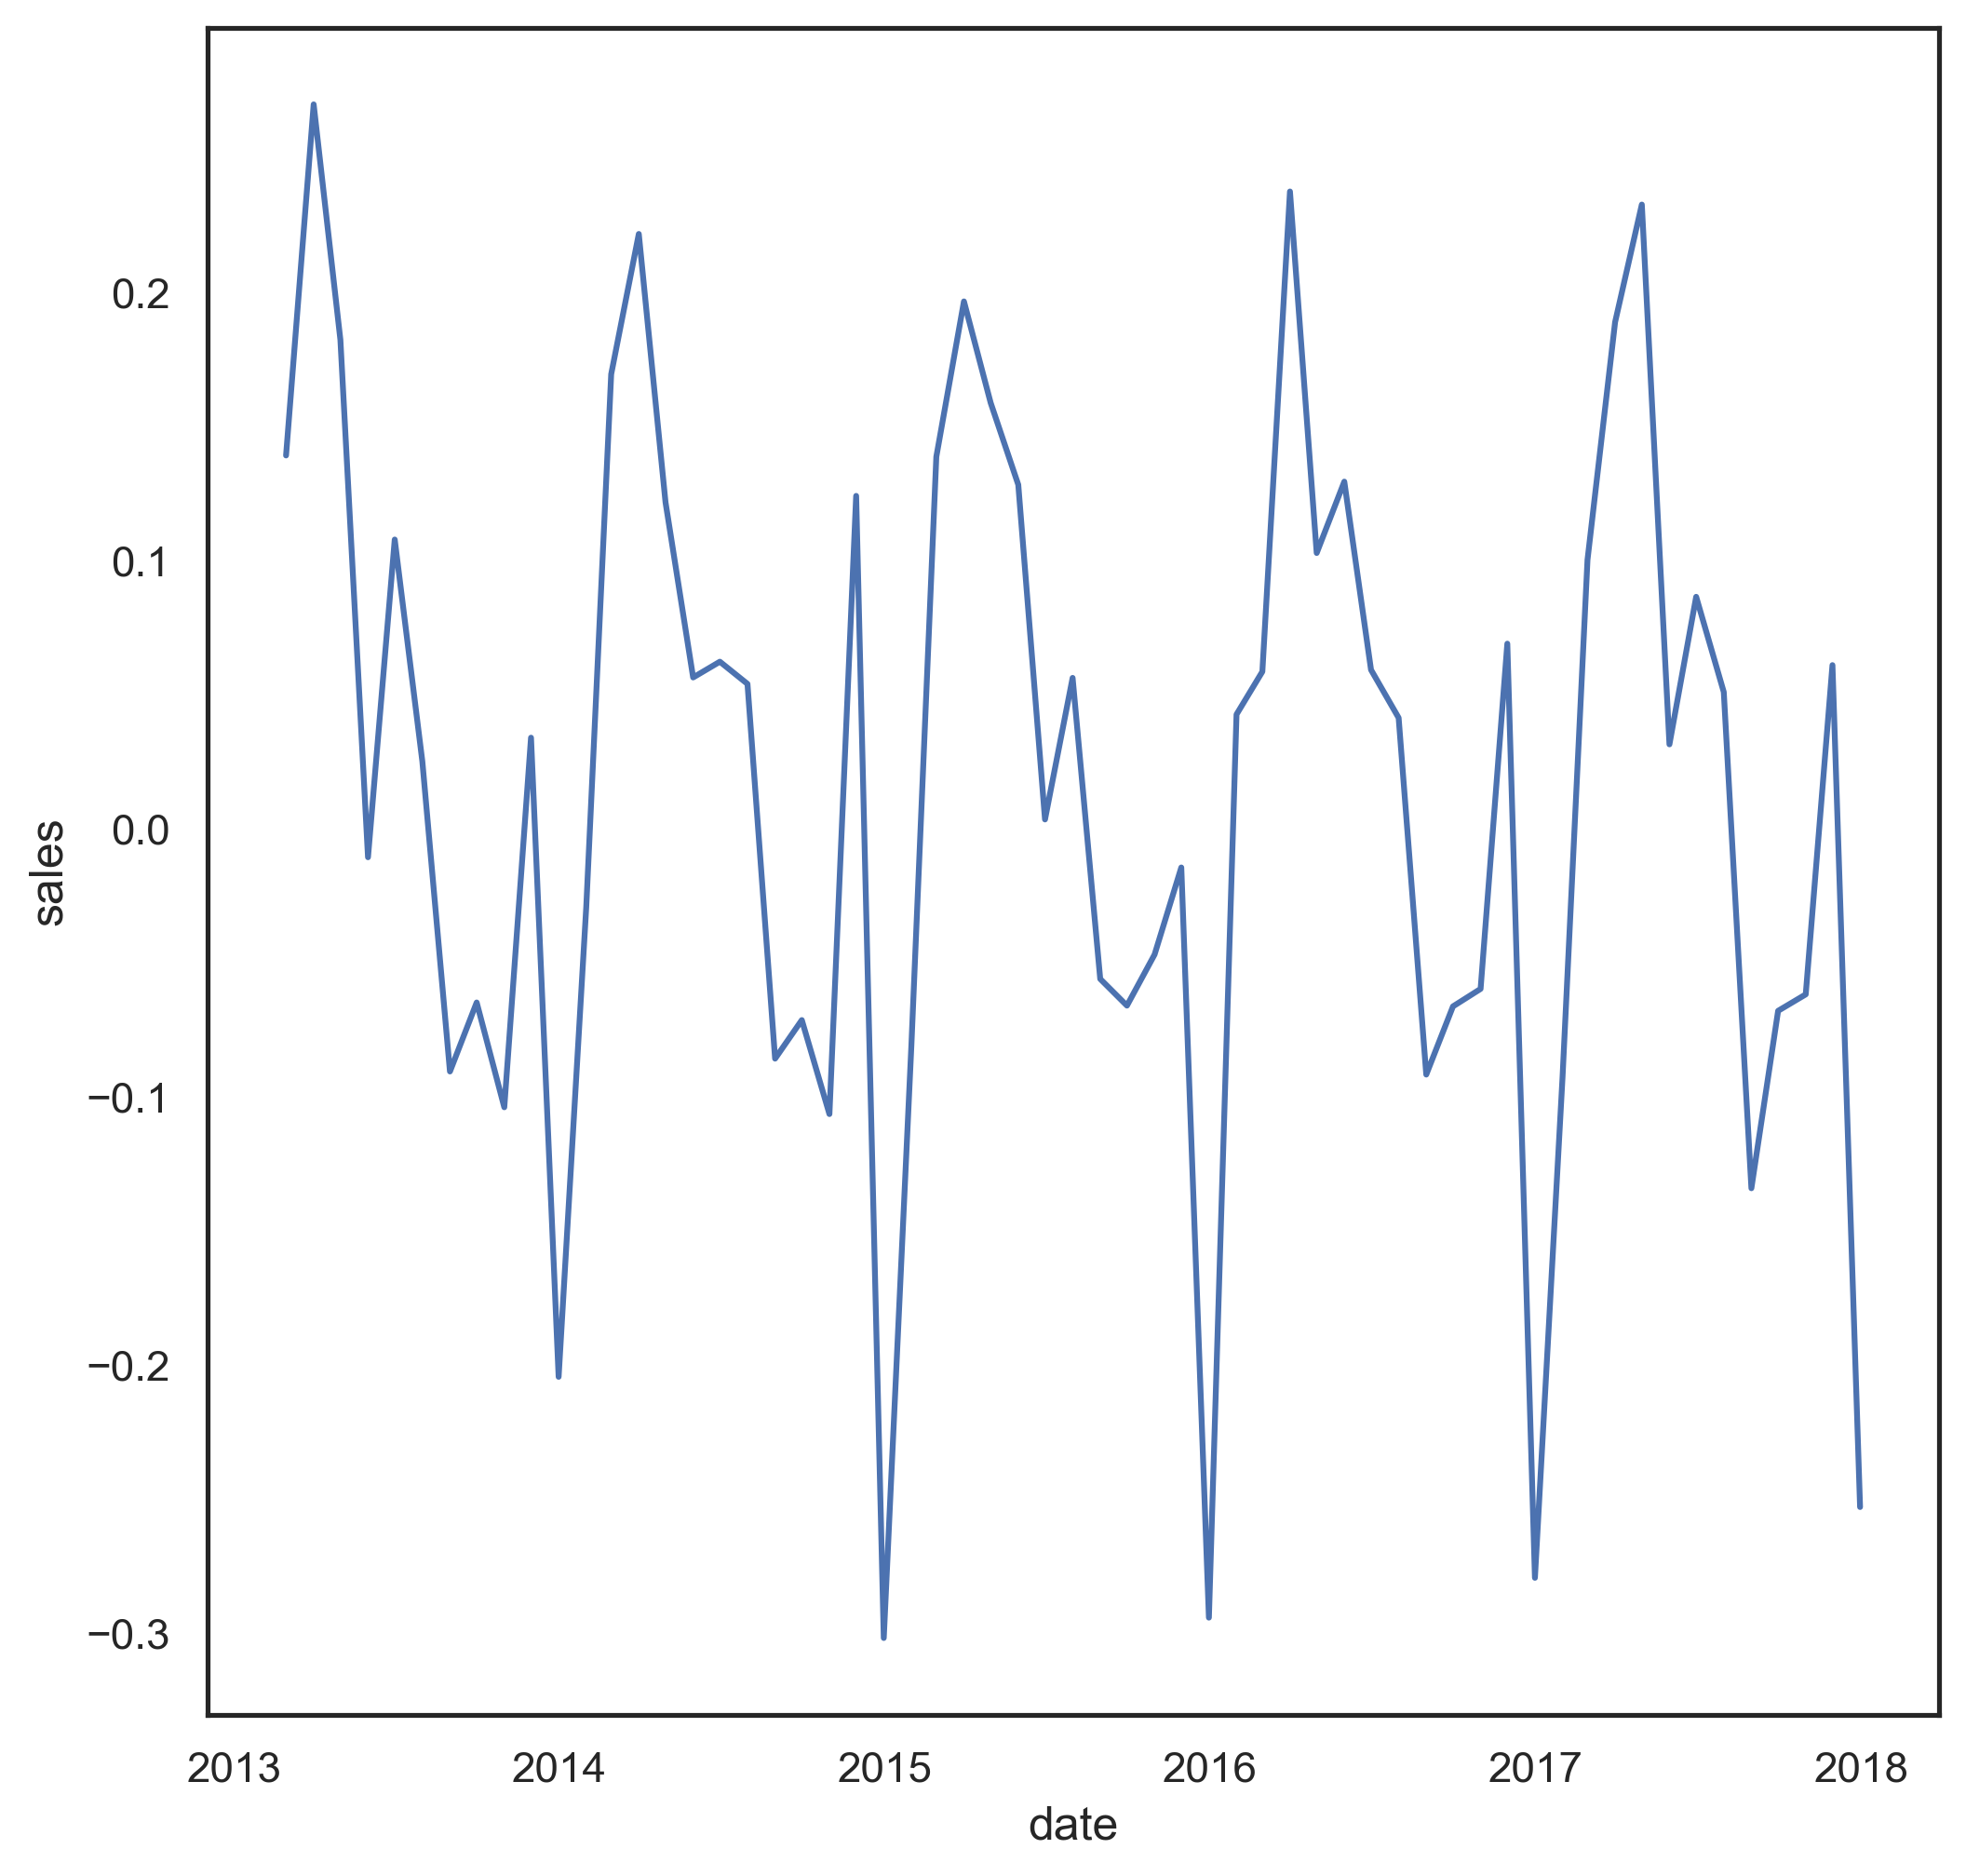

In [133]:
sns.lineplot(data = mMeanSales, x='date', y=mMeanSales['sales'].pct_change())